# Analyzing [EDA Aviation Accidents Database]
## Data Science Project
### A Comprehensive Analysis using Pandas, Matplotlib, and Seaborn
- **Simiyu David Masai**
- **Moringa School**  
- **25/11/2024**


In [707]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv


### 1. Loading the dataset and getting information

In [708]:
#load data
data=pd.read_csv('C:\\Users\\User\\Downloads\\endphase_data\\AviationData.csv', encoding='ISO-8859-1', engine='python')


In [709]:
#Getting a quick overview of the data
#first 5 rows and columns
data.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [710]:
#last 5 rows and columns
data.tail(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Observation : the dataset values are not uniform

In [711]:
#more information on datatypes about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [712]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [713]:
#check data type using dtypes
data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [714]:
#checking the shape of the dataset
data.shape
#there as 88889 rows and 31 columns

(88889, 31)

In [715]:
#concise stat
data.describe().T
#but there are missing values

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [716]:
#check columns
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 2. Data Cleaning

This step involves dropping columns not necessary in this analysis and cleaning the desired columns and rows

In [717]:
#create a copy of my dataset before performing cleaning which will involve dropping columns and rows
#Create a dataframe copy to be used in data cleaning
df = data.copy(deep = True)

In [718]:
#checking number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [719]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [720]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [721]:
#dropping unnnecessary columns to the analysis
#dropping columns with more than 50% missing values
#retaining important columns like Aircraft.Category even with 50% missing values
df=data.drop(columns=['Event.Date','Event.Id','Airport.Name','Purpose.of.flight','Airport.Code','Schedule','Investigation.Type','Accident.Number','Latitude','Longitude','Registration.Number','FAR.Description','Air.carrier','Publication.Date'])

In [722]:
#filter the DataFrame to Focus on America 
df=df[df['Country']=='United States']

In [723]:
df.head()

,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [724]:
#info on modified new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                82237 non-null  object 
 1   Country                 82248 non-null  object 
 2   Injury.Severity         82140 non-null  object 
 3   Aircraft.damage         80269 non-null  object 
 4   Aircraft.Category       28154 non-null  object 
 5   Make                    82227 non-null  object 
 6   Model                   82210 non-null  object 
 7   Amateur.Built           82227 non-null  object 
 8   Number.of.Engines       80373 non-null  float64
 9   Engine.Type             79206 non-null  object 
 10  Total.Fatal.Injuries    71594 non-null  float64
 11  Total.Serious.Injuries  70873 non-null  float64
 12  Total.Minor.Injuries    71519 non-null  float64
 13  Total.Uninjured         77243 non-null  float64
 14  Weather.Condition       81603 non-null  obj

In [725]:
#Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,80373.000000,71594.000000,70873.000000,71519.000000,77243.000000
mean,1.135481,0.421683,0.257178,0.332974,4.302448
std,0.427286,2.433647,1.144189,1.306604,23.794728
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000


In [726]:
#Describe categorical features

df.describe(include='object')

,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Weather.Condition,Broad.phase.of.flight,Report.Status
count,82237,82248,82140,80269,28154,82227,82210,82227,79206,81603,61158,79637
unique,23030,1,56,4,14,8001,11443,2,11,4,12,16974
top,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Airplane,Cessna,152,No,Reciprocating,VMC,Landing,Probable Cause
freq,434,82248,64870,61675,24229,21573,2323,73906,68507,75317,15365,61189


In [727]:
#check the colunms in new DataFrame
#check the colunms
df.columns

Index(['Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [728]:
#Change columns name to lower case for unifromity
df.columns = df.columns.str.lower()
df.columns

Index(['location', 'country', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'make', 'model', 'amateur.built',
       'number.of.engines', 'engine.type', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status'],
      dtype='object')

In [729]:

# Replacing dots in column names with underscores
df.columns = [col.replace('.', '_') for col in df.columns]

In [730]:
df.columns

Index(['location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status'],
      dtype='object')

In [731]:
df.shape

(82248, 17)

### 2.2 Checking the missing values, duplicates and dealing with them

In [732]:
#check the missing values in modified DataFrame
df.isnull().sum()

location                     11
country                       0
injury_severity             108
aircraft_damage            1979
aircraft_category         54094
make                         21
model                        38
amateur_built                21
number_of_engines          1875
engine_type                3042
total_fatal_injuries      10654
total_serious_injuries    11375
total_minor_injuries      10729
total_uninjured            5005
weather_condition           645
broad_phase_of_flight     21090
report_status              2611
dtype: int64

In [733]:
#dropping further columns
df.drop(columns=['total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured','report_status'],inplace=True)

In [734]:
#Location columns
#imputting 'unknown' as a fized value in the column

df['location'].fillna('unknown',inplace=True)
df['location'].isna().sum() #all null values are removed

C:\Users\User\AppData\Local\Temp\ipykernel_15604\1961790175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('unknown',inplace=True)


np.int64(0)

In [735]:
#we just want t2o values fatal or non-fatal values
# Now replace all records of Fatal(n) with 'Fatal'
df['injury_severity'] = df['injury_severity'].replace(to_replace=r'Fatal\(\d+\)', value='Fatal', regex=True)

df['injury_severity']=df['injury_severity'].replace('Serious','Fatal')

df['injury_severity']=df['injury_severity'].replace('Minor','Non-Fatal')

#check to see if Fatal(n) have been changed
df['injury_severity'].head(5)

# Nan values were 108, drop rows with NaN values in 'injury_severity'
df = df.dropna(subset=['injury_severity'])

print(df['injury_severity'].value_counts())


injury_severity
Non-Fatal      65073
Fatal          15179
Incident        1873
Unavailable       15
Name: count, dtype: int64


In [767]:
# Filter rows when 'injury_severity' is 'Incident' and select 'aircraft_damage' 
#so as to see how severitu of damage aaffects injury_severity
#using this to impute to Fatal or Non-Fatal
#if minor impute values i.e 1179 to non-fatal values
#if substantial and destroyed impute 7  to fatal

new = df[df['injury_severity'] == 'Incident'][['aircraft_damage']]
print(new.value_counts())

# Impute 'injury_severity' for 'Incident' rows based on 'aircraft_damage'
df['injury_severity'] = new.apply(
    lambda row: 'Non-Fatal' if row['injury_severity'] == 'Incident' and row['aircraft_damage'] == 'Minor'
    else ('Fatal' if row['injury_severity'] == 'Incident' and row['aircraft_damage'] in ['Substantial', 'Destroyed']
    else row['injury_severity']),  # If no conditions match, keep the original value
    axis=1
)

# Check the result after imputation
print(df['injury_severity'].value_counts())



Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [768]:
#air_craft damage column
print(df['aircraft_damage'].isna().sum())
# Nan values were 1979, drop rows with NaN values in 'aircraft_damage' as there is no way to validate the rate of damage
df = df.dropna(subset=['aircraft_damage'])
#check again
print(df['aircraft_damage'].isna().sum())

0
0


In [769]:
#aircraft_category
df['aircraft_category'].isna().sum()
#so many missing values 
df.drop('aircraft_category',axis=1,inplace=True)
#check
df.columns


KeyError: 'aircraft_category'

In [ ]:
#use amateur_built to filter out plane,model and built data
df.drop(df[df['amateur_built'] == 'Yes'].index, inplace=True)

#drop the column
df.drop('amateur_built',axis=1,inplace=True)



In [ ]:
#make columns
print(df.make.isna().sum())
#2 missing values in a category of planes, drop it affects analysis when make is unknown
df.dropna(subset='make',inplace=True)
#check
print(df['make'].isna().sum())


1
0


In [ ]:
print(df['make'].value_counts())
#CESSNA-4227 similar to Cessna only thats in Uppercase
# Convert the 'make' column to lowercase
df['make'] = df['make'].str.lower()
#print the value counts after normalizing the case
print(df['make'].value_counts())
#value of cessna is okay


make
Cessna                       21364
Piper                        11557
CESSNA                        4218
Beech                         4109
PIPER                         2479
                             ...  
Aeronca/bubeck                   1
Burkhart Grob Flugzeugbah        1
Extra Flugzeugrau Gmbh           1
Mooney Aircraft Corp             1
STORY CHARLES BRAD               1
Name: count, Length: 2122, dtype: int64
make
cessna                            25582
piper                             14036
beech                              4988
bell                               2234
mooney                             1277
                                  ...  
c m stuhrenberg/p c polete            1
boeing (stearman)                     1
flight design general avn gmbh        1
ray e roberts                         1
honda aircraft                        1
Name: count, Length: 1739, dtype: int64


In [ ]:
#model column
print(df.model.isna().sum())
#there are 7 missing values, we will drop them 
#drop the missing model values
df.dropna(subset='model',inplace=True)
#check
print(df.model.isna().sum())

7
0


In [ ]:
#number_of_engines column
print(df['number_of_engines'].isna().sum())
#impute missing values with mean for now
df['number_of_engines'].mean()
df['number_of_engines'].fillna(1,inplace=True)
#check
print(df['number_of_engines'].isna().sum())

1342
0


C:\Users\User\AppData\Local\Temp\ipykernel_15604\1857522665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_engines'].fillna(1,inplace=True)


In [ ]:
#dropping the engine_type column, not useful for analysis for now
#info on plane chosen will include engine info.
df.drop('engine_type',axis=1,inplace=True)
#check
df.columns



Index(['location', 'country', 'injury_severity', 'aircraft_damage', 'make',
       'model', 'number_of_engines', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [ ]:
#weather conditions column
print(df.weather_condition.isna().sum())
#we cannot assume the weather during a crash so we will drop this values so as not to influence our analysis
df.dropna(subset='weather_condition',inplace=True)
#check
print(df.weather_condition.isna().sum())


475
0


In [ ]:
# broad_phase_of_flight
df['broad_phase_of_flight']
#name is too long edit
df.columns=df.columns.str.replace('broad_phase_of_flight','phase_of_flight')
#check
df.columns

Index(['location', 'country', 'injury_severity', 'aircraft_damage', 'make',
       'model', 'number_of_engines', 'weather_condition', 'phase_of_flight'],
      dtype='object')

In [ ]:
#checking null values in phase_of_flight column

df['phase_of_flight'].isna().sum()

#impute mean with fixed value
df['phase_of_flight'].fillna('Unknown',inplace=True)

#check

df['phase_of_flight'].isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_15604\3951411980.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phase_of_flight'].fillna('Unknown',inplace=True)


np.int64(0)

In [ ]:
#dealt with all null values in dataframe
df.isna().sum()

location             0
country              0
injury_severity      0
aircraft_damage      0
make                 0
model                0
number_of_engines    0
weather_condition    0
phase_of_flight      0
dtype: int64

In [ ]:
#create copy for Exploratory Data Analysis
df_eda = df.copy(deep=True)
df_eda.head(10)

,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,weather_condition,phase_of_flight
0,"MOOSE CREEK, ID",United States,Fatal,Destroyed,stinson,108-3,1.0,UNK,Cruise
1,"BRIDGEPORT, CA",United States,Fatal,Destroyed,piper,PA24-180,1.0,UNK,Unknown
2,"Saltville, VA",United States,Fatal,Destroyed,cessna,172M,1.0,IMC,Cruise
3,"EUREKA, CA",United States,Fatal,Destroyed,rockwell,112,1.0,IMC,Cruise
4,"Canton, OH",United States,Fatal,Destroyed,cessna,501,1.0,VMC,Approach
5,"BOSTON, MA",United States,Non-Fatal,Substantial,mcdonnell douglas,DC9,2.0,VMC,Climb
6,"COTTON, MN",United States,Fatal,Destroyed,cessna,180,1.0,IMC,Unknown
7,"PULLMAN, WA",United States,Non-Fatal,Substantial,cessna,140,1.0,VMC,Takeoff
8,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,cessna,401B,2.0,IMC,Landing
9,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,north american,NAVION L-17B,1.0,IMC,Cruise


In [ ]:
df_eda.isna().sum()

location             0
country              0
injury_severity      0
aircraft_damage      0
make                 0
model                0
number_of_engines    0
weather_condition    0
phase_of_flight      0
dtype: int64

# Exploratory Data Analysis

## 1. Univeriate Analysis

Analyse individual columns one by one

Goals:

Identify and recommend the safest, lowest-risk aircraft for commercial and private aviation to help expand into new markets while minimizing potential financial and reputational risks associated with aviation accidents.

Analyze historical aviation accident data to determine patterns and identify aircraft models associated with the highest and lowest risks.

Investigate the relationship between accident frequency and the severity of passenger and crew injuries to prioritize safety features in aircraft

Evaluate aviation accident rates in different regions, such as North America, to identify geographic trends and regional risk factors, to understand which regions have the highest aviation accident rates and identify the airports most commonly associated with these accidents

In [ ]:
df_eda.dtypes

location              object
country               object
injury_severity       object
aircraft_damage       object
make                  object
model                 object
number_of_engines    float64
weather_condition     object
phase_of_flight       object
dtype: object

make
cessna               25463
piper                13976
beech                 4962
bell                  2224
mooney                1269
                     ...  
miller-thorp             1
curtis                   1
mcdonnell-douglas        1
orlican s r o            1
foster william d         1
Name: count, Length: 1693, dtype: int64


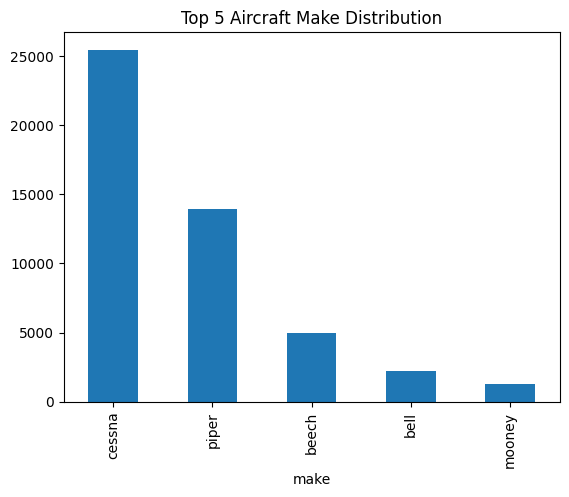

In [ ]:
#check the distribution of plane make and model variables
#Analyzing aircraft make and model, #Analyzing aircraft make and model, most common plane makeand model

print(df_eda['make'].value_counts())

#Visualize using top 5 makes (brands) using bar plots
df_eda['make'].value_counts()[:5].plot(kind='bar', title='Top 5 Aircraft Make Distribution')
plt.show()


make    model
cessna  152      2306
        172      1599
        172N     1119
        150       779
        172M      769
Name: count, dtype: int64


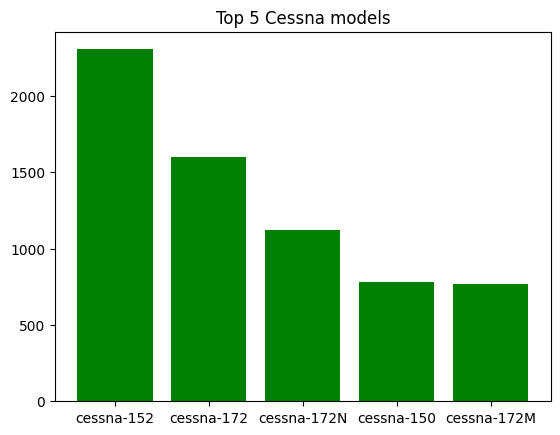

In [ ]:
new=df_eda[df_eda['make']=='cessna'][['make','model']]
print(new.value_counts()[:5])#top 5 aircraft brand and mode

#visualize top 5 plane models
x=['cessna-152','cessna-172','cessna-172N','cessna-150','cessna-172M']
y=new['model'].value_counts()[:5]

plt.bar(x,y,color='g')
plt.title('Top 5 Cessna models')
plt.show()
 


Most common plane brand in our dataset is Cessna

Most common plane model in our dataset is the Cessna 152


In [ ]:
type(new.value_counts()[:5])

pandas.core.series.Series

make    model    
cessna  152          2306
        172          1599
        172N         1119
piper   PA-28-140     896
cessna  150           779
Name: count, dtype: int64


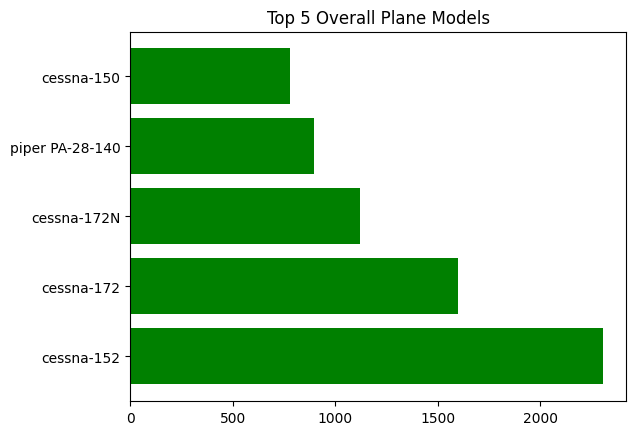

In [ ]:
#top 5 overall plane models
model_count=df_eda[['make','model']]
print(model_count.value_counts()[:5])
#visualize the top 5 plane models
x=['cessna-152','cessna-172','cessna-172N','piper PA-28-140','cessna-150']
y=model_count['model'].value_counts()[:5]

plt.barh(x,width=y,color='g')
plt.title('Top 5 Overall Plane Models')
plt.show()

2. Analyze injury_severity

Goal: Investigate patterns in accident severity.

Use bar charts to visualize the frequency of each severity level.

injury_severity
Non-Fatal      57567
Fatal          12667
Incident        1186
Unavailable       14
Name: count, dtype: int64


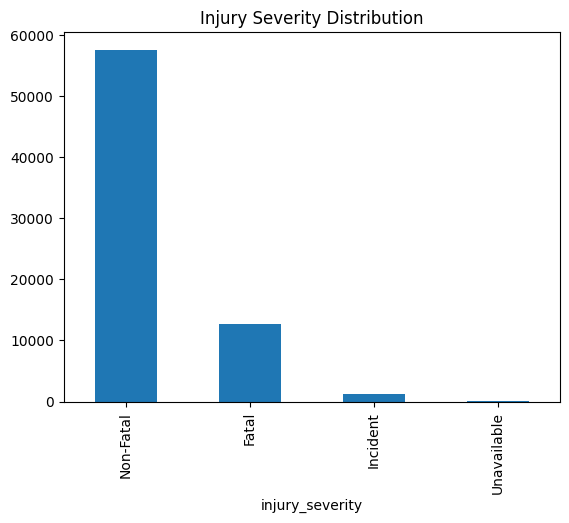

In [ ]:
# Analyzing injury severity
print(df_eda['injury_severity'].value_counts())
df_eda['injury_severity'].value_counts().plot(kind='bar', title='Injury Severity Distribution')
plt.show()
